# Heat Maps

A __heat map__ is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes.

In a heatmap, the field is divided into a grid of cells and the number of data points in each cell is counted up. Each cell is then given a color based on the count of values. The more data points in a grid cell, the darker the color. Consider adding count annotations on top of each grid cell especially if you have a limited number of cells. 

Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d() function.

A heat map is favored over a scatter plot when you have two discrete variables since the associated jittered scatter plot can already be imprecise. 

Heat maps are a good alternative to use of transparency when you have a large amount of data. However, like histograms, beware of the impact of binsize on the interpretation of data.  



Heat maps are useful in the following cases:

- To represent a plot for discrete vs. another discrete variable
- As an alternative to transparency when the data points are enormous

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
# import data sets
fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')

In [3]:
# view data info
fuel_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [4]:
# view the data head
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## Heat map using matplotlib
Use plt.hist2d. also use plt.colorbar()

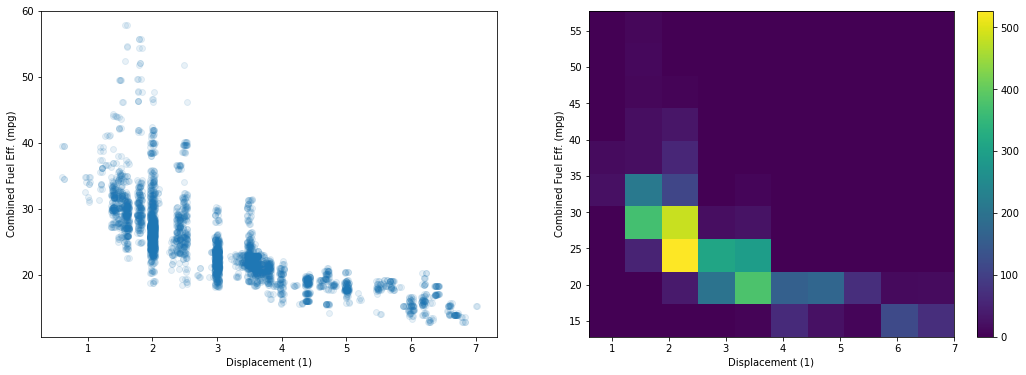

In [5]:
plt.figure(figsize = [18,6])

# plot on the left
plt.subplot(1,2,1)
sb.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04, scatter_kws={'alpha':1/10}, fit_reg=False)
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

#plot on the right
plt.subplot(1,2,2)
plt.hist2d(data=fuel_econ, x='displ', y='comb')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

### Additional variables
#### Set a minimum bound on counts and a reverse color map

1. To select a different color palette, you can set the "cmap" parameter in hist2d. The most convenient way of doing this is to set the "cmap" value as a string referencing a built-in Matplotlib palette. A list of valid strings can be found on this part of the Pyplot API documentation. We can reverse the default "viridis" color palette, by setting cmap = 'viridis_r'.

2. Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a cmin = 0.5 parameter to the hist2d call, this means that a cell will only get colored if it contains at least one point.

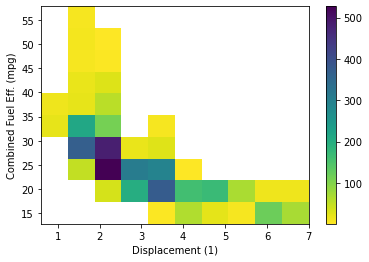

In [6]:
# use cmin to set a minimum bound of counts
# use cmap to reverse the color map

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

As the count of points in the cell increases, the color in the heatmap gets brighter and moves from blue to yellow.

###  Heat plot - Specify bin edges

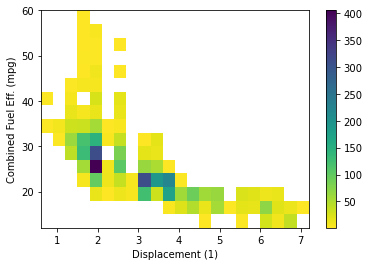

In [7]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Notice the areas of high frequency in the middle of the negative trend in the plot. Notice that since we have two variables, 
# the "bins" parameter takes a list of two bin edge specifications, one for each dimension.
#  Choosing an appropriate bin size is just as important here as it was for the univariate histogram.


### Annotations on each cell

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From hist2d, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots. We can get the counts to annotate directly from what is returned by hist2d, which includes not just the plotting object, but an array of counts and two vectors of bin edges.

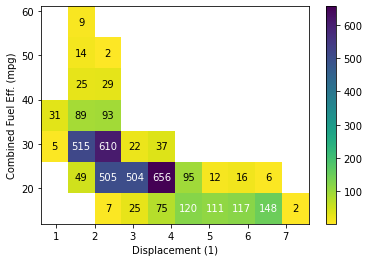

In [8]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)

# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 

h2d = plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves.

You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap() function that is built for categorical heatmaps.

Practice:

Most of the data fall in a large blob between 10 and 30 mpg city and 20 to 40 mpg highway. 

Some transparency is added via 'alpha' to show the concentration of data. Interestingly, for most cars highway mileage is clearly higher than city mileage, but for those cars with city mileage above about 30 mpg, the distinction is less pronounced.

In fact, most cars above 45 mpg city have better city mileage than highway mileage, contrary to the main trend. It might be good to call out this trend by adding a diagonal line to the figure using the plot function.

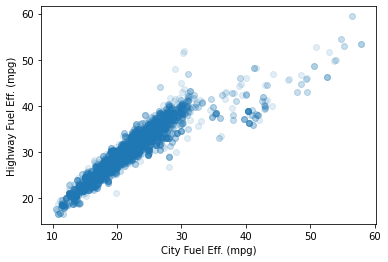

In [9]:
def scatterplot_solution_1():
  # data setup
  fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')
  plt.scatter(data = fuel_econ, x = 'city', y = 'highway', alpha = 1/8)
  # plt.plot([10,60], [10,60]) # diagonal line from (10,10) to (60,60)
  plt.xlabel('City Fuel Eff. (mpg)')
  plt.ylabel('Highway Fuel Eff. (mpg)')

scatterplot_solution_1()

In the heat map, I've set up a color map that goes from light to dark and made it so that any cells without count don't get colored in. The visualization shows that most cars fall in a line where larger engine sizes correlate with higher emissions. The trend is somewhat broken by those cars with the lowest emissions, which still have engine sizes shared by most cars (between 1 and 3 liters).

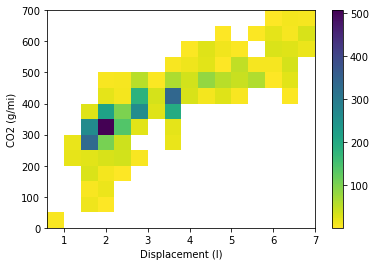

In [10]:
def scatterplot_solution_2():
  # data setup
  fuel_econ = pd.read_csv('../1. Data Files/fuel-econ.csv')
  bins_x = np.arange(0.6, fuel_econ['displ'].max()+0.4, 0.4)
  bins_y = np.arange(0, fuel_econ['co2'].max()+50, 50)
  plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
  plt.colorbar()
  plt.xlabel('Displacement (l)')
  plt.ylabel('CO2 (g/mi)')

scatterplot_solution_2()